##Content

[1. Libraries ](#1)

[2. Drawing Pitch Map](#2)

[3. Pass Map](#3) 

[4. MPL Soccer](#4) 

[5. Heat Maps](#5) 

[6. Time Series Chart](#6) 

[7. Pass Map](#7) 

<a id='1'></a>
# Libraries

In [ ]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Arc
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch

In [ ]:
import json
import requests
from pandas import json_normalize
import numpy as np
import warnings

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

<a id='2'></a>
# Drawing Pitch Map

In [ ]:
import math

def Pitch(ax, height = 120,  width=80, line_color = "black", pitch_color = "white", mode = "full", pitch_linewidth = 1):

    def int_angles(radius, h, k, line_x):
        """
        Calculate the intersection angles of the arc above the D-boxes
        
        Parameters: 
            radius (float): Radius of the arc
            h(float): x coordinate of the centre of the arc
            k(float): y coordiante of the centre of the arc
            line_x(float): x coordinate of the D-box or the line to be intersected by the arc
      
        Returns: 
            theta1(float): First intersection angle
            theta2(float): Second intersection angle
        """
        y1 = math.sqrt(radius**2 - (line_x - h)**2) + k
        y2 = math.sqrt(radius**2 - (line_x - h)**2)*-1 + k
        y = (y1-y2)/2
        theta1 = math.degrees(math.asin(y/radius))
        theta2 = 360-theta1

        return theta1, theta2

    
    #Pitch Outline
    ax.plot([0,0],[0,width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([0,height],[width,width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([height,height],[width,0], color=line_color, linewidth = pitch_linewidth)
    ax.plot([height,0],[0,0], color=line_color, linewidth = pitch_linewidth)

    
    ##Halfway-line
    ax.plot([height/2, height/2],[0,width], color=line_color, linewidth = pitch_linewidth)

    #Left Penalty Area
    ax.plot([0,.15*height],[.225*width, .225*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.15*height, .15*height],[.225*width,0.775*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.15*height,0],[.775*width, .775*width], color=line_color, linewidth = pitch_linewidth)

    #Right Penalty Area
    ax.plot([.85*height,height],[.15*height, .15*height], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.85*height,.85*height],[.15*height, .775*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.85*height,height],[.775*width, .775*width], color=line_color, linewidth = pitch_linewidth)
    
    #6-yard box left
    ax.plot([0,.05*height],[.375*width, .375*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.05*height, .05*height],[.375*width,width - .375*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([0,.05*height],[.625*width, .625*width ], color=line_color, linewidth = pitch_linewidth)    

    #6-yard box right
    ax.plot([.95*height,height],[.375*width, .375*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.95*height,114],[.375*width, .625*width], color=line_color, linewidth = pitch_linewidth)
    ax.plot([.95*height,height],[.625*width, .625*width], color=line_color, linewidth = pitch_linewidth)

      
        #Prepare Circles
    centreCircle = plt.Circle((height/2, width/2),.076*height,color=line_color,fill=False, zorder=5)
    centreSpot = plt.Circle((height/2, width/2),0.8,color=line_color)
    leftPenSpot = plt.Circle((.1*height,40),0.8,color=line_color)
    rightPenSpot = plt.Circle((.9*height,40),0.8,color=line_color)

                
        #Prepare Arcs
    theta1, theta2 = int_angles(radius = height/12,
                                h = .1*height,
                                k= width/2,
                                line_x = .15*height)

    
    leftArc = Arc((.1*height,40),
                              height=0.15*height,
                              width=0.15*height,
                              angle=0,
                              theta1=theta2,
                              theta2=theta1,
                              color=line_color,
                              zorder=5)
    
    theta1, theta2 = int_angles(radius = height/12,
                                h = .9*height,
                                k= width/2,
                                line_x = .85*height)
    
    rightArc = Arc((.9*height,40),
                               height=0.15*height,
                               width=0.15*height,
                               angle=180,
                               theta1=theta2,
                               theta2=theta1,
                               color=line_color,
                               zorder=5)

        ##Add corner arcs
    left_bottom = Arc((0,0),
                  height=.05*height,
                  width=0.05*height,
                  angle=270,
                  theta1=90,
                  theta2=180,
                  color=line_color,
                  zorder=5)

    left_top = Arc((0,width),
                  height=.05*height,
                  width=0.05*height,
                  angle=0,
                  theta1=270,
                  theta2=0,
                  color=line_color,
                   zorder=5)

    right_bottom = Arc((height, 0),
                  height=.05*height,
                  width=0.05*height,
                  angle=0,
                  theta1=90,
                  theta2=180,
                  color=line_color,
                   zorder=5    )
    
    right_top = Arc((height, width),
                  height=.05*height,
                  width=0.05*height,
                  angle=90,
                  theta1=90,
                  theta2=180,
                  color=line_color,
                   zorder=5 )    

    
        #Goals
    ax.plot([0,0],[.45*width, .55*width],color=line_color, linewidth = pitch_linewidth*4)
    ax.plot([height, height],[.45*width, .55*width],color=line_color, linewidth = pitch_linewidth*4)

        #Add patches
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    if mode == "full":
        ax.add_patch(left_bottom)
        ax.add_patch(left_top)
        ax.add_patch(right_bottom)
        ax.add_patch(right_top)

    ax.set_aspect("equal")
    ax.axis("off")

    return ax

<a id='3'></a>
# Pass Map

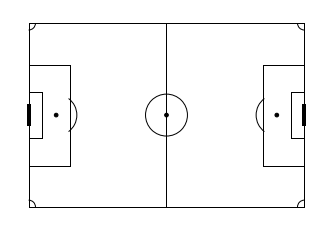

In [ ]:
match_id = "8658"
side = "away"
color = "blue"
min_pass_count = 2 ##minimum number of passes for a link to be plotted

fig, ax = plt.subplots()
ax = Pitch(ax)

In [ ]:
class Player:
    def __init__(self, player, df):
        self.id = player["player"]["id"]
        self.name = player["player"]["name"]
        self.average_position(df)

    def average_position(self, df):

        player_pass_df = df.query("(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) & (player_id == @self.id) & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
        self.x, self.y = np.mean(player_pass_df['location'].tolist(), axis=0)

        self.n_passes_completed = len(player_pass_df)


In [ ]:

def load_file(match_id, getter="remote", path = None):
    """ """

    if getter == "local":
        with open(f"{path}/{match_id}.json", "r", encoding="utf-8") as f:
            match_dict = json.load(f)
            df = json_normalize(match_dict, sep="_")
            df = df.query("location == location")
            df[['x','y']] = pd.DataFrame(df.location.values.tolist(), index= df.index)
            df['y'] = 80 - df['y'] ##Reversing the y-axis co-ordinates because Statsbomb use this weird co-ordinate system
            df['location'] = df[['x', 'y']].apply(list, axis=1)

        return match_dict, df

    elif getter == "remote":
        resp = requests.get(f"https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{match_id}.json")

        match_dict = json.loads(resp.text)
        df = json_normalize(match_dict, sep="_")
        df = df.query("location == location")
        df[['x','y']] = pd.DataFrame(df.location.values.tolist(), index= df.index)
        df['y'] = 80 - df['y'] ##Reversing the y-axis co-ordinates because Statsbomb use this reversed co-ordinate system
        df['location'] = df[['x', 'y']].apply(list, axis=1)

        return match_dict, df



In [ ]:
match_dict,df=load_file(8658)

In [ ]:
print(match_dict[0])

{'id': '47638847-fd43-4656-b49c-cff64e5cfc0a', 'index': 1, 'period': 1, 'timestamp': '00:00:00.000', 'minute': 0, 'second': 0, 'type': {'id': 35, 'name': 'Starting XI'}, 'possession': 1, 'possession_team': {'id': 771, 'name': 'France'}, 'play_pattern': {'id': 1, 'name': 'Regular Play'}, 'team': {'id': 771, 'name': 'France'}, 'duration': 0.0, 'tactics': {'formation': 442, 'lineup': [{'player': {'id': 3099, 'name': 'Hugo Lloris'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1}, {'player': {'id': 5476, 'name': 'Benjamin Pavard'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 2}, {'player': {'id': 5485, 'name': 'Raphaël Varane'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 4}, {'player': {'id': 5492, 'name': 'Samuel Yves Umtiti'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 5}, {'player': {'id': 5484, 'name': 'Lucas Hernández Pi'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 21}, {'player': 

In [ ]:
def get_starters(match_dict, side="home"):
    """ """
    lineups = match_dict[0]["tactics"]["lineup"] if side == "home" else match_dict[1]["tactics"]["lineup"]
    return lineups


In [ ]:
match_dict, df = load_file(match_id, getter="remote")
lineups = get_starters(match_dict, side=side)

In [ ]:
side_dict = {"home": match_dict[0]["team"]["name"],
             "away": match_dict[1]["team"]["name"] }

print(side_dict)

## {'home': 'France', 'away': 'Croatia'}

{'home': 'France', 'away': 'Croatia'}


In [ ]:
player_objs_dict = {}
starters = []
for player in lineups:
    starters.append(player["player"]["name"]) ##To remove all substitutes from our final grouped_df
    p = Player(player, df) ##Calling the Player class
    player_objs_dict.update({player["player"]["name"]: p}) ##For lookup during plotting the grouped_df


In [ ]:
total_pass_df = df.query(f"(type_name == 'Pass') & (pass_type_name not in ['Free Kick', 'Corner', 'Throw-in', 'Kick Off']) &"\
                                 f"(team_name == '{side_dict[side]}') & (pass_outcome_name not in ['Unknown','Out','Pass Offside','Injury Clearance', 'Incomplete'])")
total_pass_df = total_pass_df.groupby(["player_name", "pass_recipient_name"]).size().reset_index(name="count")
total_pass_df = total_pass_df.query(" (player_name == @starters) & (pass_recipient_name == @starters) & (count>=@min_pass_count) ")

In [ ]:
print(total_pass_df)

        player_name pass_recipient_name  count
8        Ante Rebić        Ivan Perišić      2
12       Ante Rebić       Šime Vrsaljko      2
13  Danijel Subašić        Dejan Lovren      4
14  Danijel Subašić        Domagoj Vida      3
16     Dejan Lovren     Danijel Subašić      3
..              ...                 ...    ...
92    Šime Vrsaljko        Ivan Perišić      6
93    Šime Vrsaljko        Ivan Rakitić      3
94    Šime Vrsaljko         Luka Modrić      9
95    Šime Vrsaljko    Marcelo Brozović     10
96    Šime Vrsaljko     Mario Mandžukić      5

[63 rows x 3 columns]


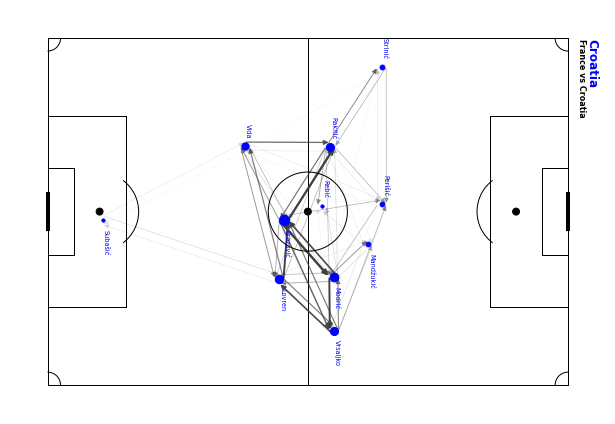

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax = Pitch(ax)
arrow_shift = 1 ##Units by which the arrow moves from its original position
shrink_val = 1.5 ##Units by which the arrow is shortened from the end_points

##Visualising the passmap

for row in total_pass_df.itertuples():

    link = row[3] ## for the arrow-width and the alpha
    passer = player_objs_dict[row[1]]
    receiver = player_objs_dict[row[2]]

    alpha = link/15
    if alpha >1:
        alpha=1

    if abs( receiver.x - passer.x) > abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw = link*0.12, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x, receiver.y - arrow_shift), xytext=(passer.x, passer.y - arrow_shift),arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

    elif abs(receiver.x - passer.x) <= abs(receiver.y - passer.y):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x + arrow_shift, receiver.y), xytext=(passer.x + arrow_shift, passer.y),arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x - arrow_shift, receiver.y), xytext=(passer.x - arrow_shift, passer.y),arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))
for name, player in player_objs_dict.items():

    ax.scatter(player.x, player.y, s=player.n_passes_completed*1.3, color=color, zorder = 4)
    ax.text(player.x, player.y+2 if player.y >40 else player.y -2, s=player.name.split(" ")[-1], rotation=270, va="top" if player.y<40 else "bottom", size=6.5, fontweight="book", zorder=7, color=color)

ax.text(124, 80, f"{side_dict[side]}", size=12, fontweight="demibold", rotation=270, color=color, va="top")
ax.text(122, 80, f"{side_dict['home']} vs {side_dict['away']}", size=8, fontweight="demibold", rotation = 270, va="top")
fig.tight_layout()
plt.show()

<a id='4'></a>
# MPL Soccer

In [ ]:
pip install mplsoccer

In [ ]:
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch

##Plot a StatsBomb pitch:
refer:https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html

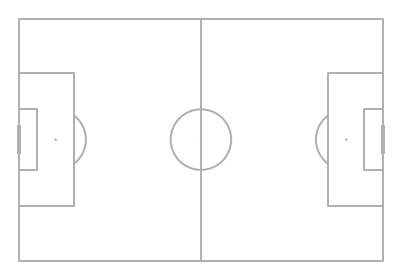

In [ ]:
pitch = Pitch()
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

##Radar Chart
refer:https://mplsoccer.readthedocs.io/en/latest/gallery/radar/plot_radar.html


In [ ]:
from mplsoccer import Radar, FontManager

Parameter:

In [ ]:
# parameter names of the statistics we want to show
params = ["npxG+xA", "Shot-Creating Actions", "Pass Completion %", "Progressive Passes Rec", "Progressive Carries",
          "Progressive Passes", "Interceptions", "Goal-Creating Actions",
          "Key Passes", "Passes Under Pressure", "Through balls"]

# The lower and upper boundaries for the statistics
low =  [0.01, 0.55, 65.7, 0.21, 0.78 , 1.39, 0.49, 0, 0.12, 3.55, 0]
high = [0.59, 5.77, 93.2, 6.84, 10.02, 9.41, 4, 0.68, 3.55, 15.79, 0.51]

In [ ]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*11,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [ ]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

Values:

In [ ]:
bruno_values =  [0.15, 2.99, 86.00, 3.47, 7.77, 4.14, 1.84, 0.28, 1.33, 6.21, 0.09]
bruyne_values = [0.30, 2.35, 91.7, 4.13, 7.32, 4.40, 1.09, 0.17, 1.43, 10.21, 0.15]

create a function to plot a radar flanked with a title and an endnote axes.

In [ ]:
def radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14):
    """ Create a Radar chart flanked by a title and endnote axes.

    Parameters
    ----------
    radar_height: float, default 0.915
        The height of the radar axes in fractions of the figure height (default 91.5%).
    title_height: float, default 0.06
        The height of the title axes in fractions of the figure height (default 6%).
    figheight: float, default 14
        The figure height in inches.

    Returns
    -------
    fig : matplotlib.figure.Figure
    axs : dict[label, Axes]
    """
    if title_height + radar_height > 1:
        error_msg = 'Reduce one of the radar_height or title_height so the total is ≤ 1.'
        raise ValueError(error_msg)
    endnote_height = 1 - title_height - radar_height
    figwidth = figheight * radar_height
    figure, axes = plt.subplot_mosaic([['title'], ['radar'], ['endnote']],
                                      gridspec_kw={'height_ratios': [title_height, radar_height,
                                                                     endnote_height],
                                                   # the grid takes up the whole of the figure 0-1
                                                   'bottom': 0, 'left': 0, 'top': 1,
                                                   'right': 1, 'hspace': 0},
                                      figsize=(figwidth, figheight))
    axes['title'].axis('off')
    axes['endnote'].axis('off')
    return figure, axes

In [ ]:
pip install --upgrade matplotlib

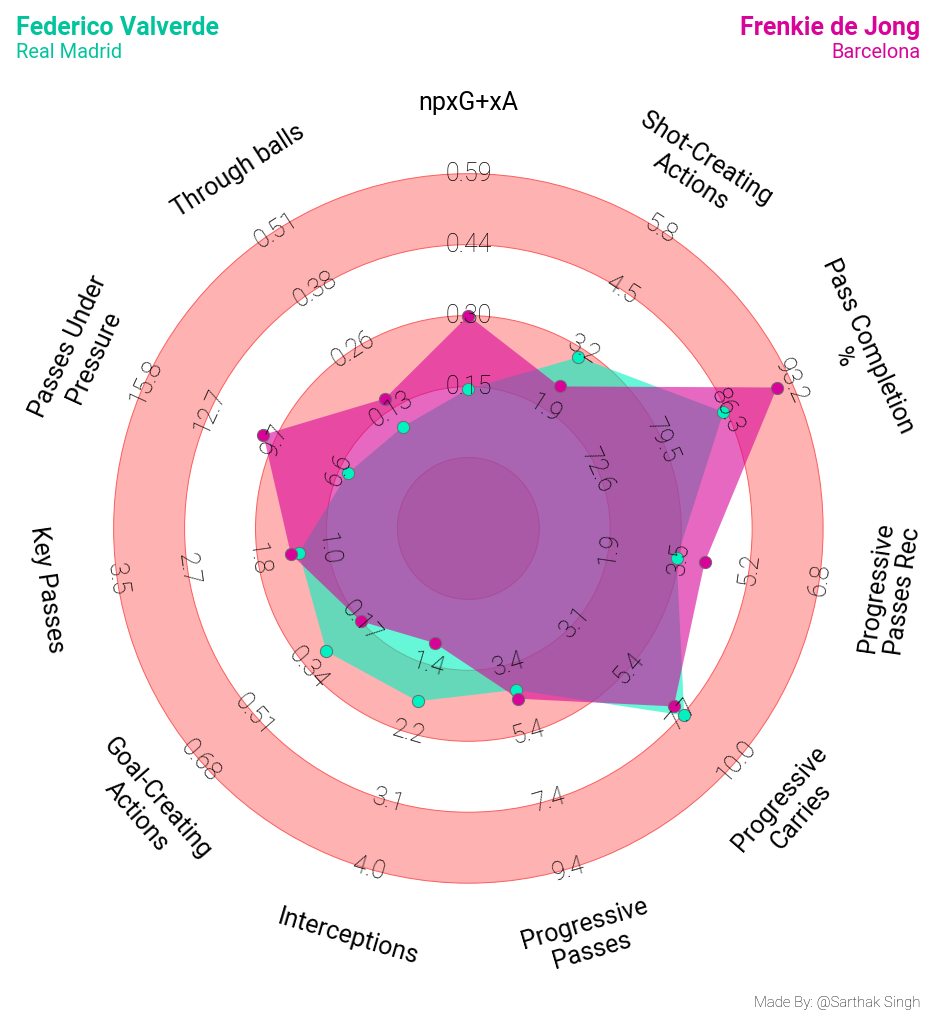

In [ ]:
# creating the figure using the function defined above:
fig, axs = radar_mosaic(radar_height=0.915, title_height=0.06, figheight=14)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_regular.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Made By: @Sarthak Singh', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Federico Valverde', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Real Madrid', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Frenkie de Jong', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Barcelona', fontsize=20,
                                fontproperties=robotto_regular.prop,
                                ha='right', va='center', color='#d80499')

##Bumpy Chart
Refer:https://mplsoccer.readthedocs.io/en/latest/gallery/bumpy_charts/plot_bumpy.html

<a id='5'></a>
#Heat Maps
Refer: https://fcpython.com/blog/creating-personal-football-heatmaps

<a id='6'></a>
#Time Series Chart
refer: https://fcpython.com/blog/calling-api-python-requests-visualising-clubelo-data
https://fcpython.com/blog/making-better-visualisations